In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import kmax as kx
import utility as util
from hierarchy import *

# Finding Tree Path Covers

In [2]:
def draw_tree(tree, layout, draw_path=True):
    rooted_tree = nx.bfs_tree(tree, 0)
    
    # nx.draw_networkx_nodes(tree, pos=layout, node_size=4)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8, font_color="tab:red")
    
    if draw_path:
        path_cover=util.path_cover(tree)
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
        
        other_edges = [(u,v) for u,v in rooted_tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(rooted_tree, pos=layout)

### Test Tree 1 [(0,1)-weights]

In [3]:
test_tree = nx.read_graphml('test1.graphml', node_type=int)

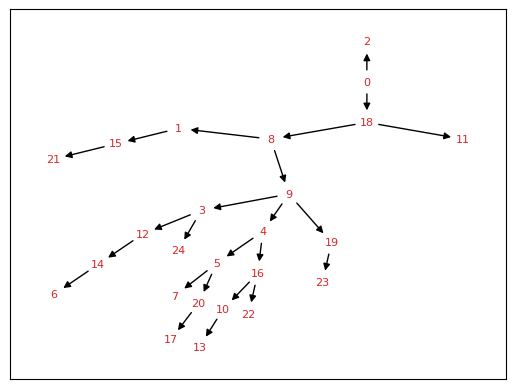

In [4]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0), draw_path=False)

0: (11.12174046994793, 0, 18, 2)
2: (0, 0.7977562074230161, None, None)
18: (9.431516803694882, 0.892467458830033, 8, 11)
8: (9.2136087981177, 0.12603851472739536, 1, 9)
11: (0, 0.09186949084978413, None, None)
1: (1.7432810981749651, 0.8381008122574674, 15, None)
9: (6.632226887685268, -0.22552858561678446, 19, 3)
15: (0.8864538053441008, 0.8568272928308645, 21, None)
3: (2.033408282585799, 0.4908051027631126, 24, 12)
4: (3.0535582336576352, 0.11258568403417335, 5, 16)
19: (0.2067345124482346, 0.8477207562304858, 23, None)
21: (0, 0.8864538053441008, None, None)
12: (1.3272090876829628, 0.3243095919924279, 14, None)
24: (0, 0.3818896029104081, None, None)
5: (0.6438187145933159, 0.5839485221388294, 7, 20)
16: (1.6085078673466766, 0.21728312957881357, 22, 10)
23: (0, 0.2067345124482346, None, None)
14: (0.9769508317917671, 0.35025825589119564, 6, None)
7: (0, 0.5737376856525619, None, None)
20: (0.044350567376415406, 0.025730461564338558, 17, None)
10: (0.6643525896073521, 0.4600428895

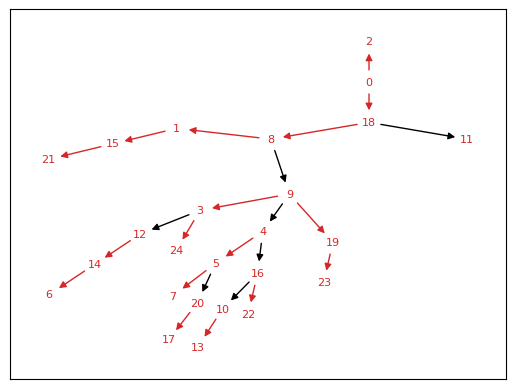

In [5]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0))

### Random tree with edge weights in [0,1)

In [6]:
n = 25
tree = nx.random_labeled_tree(n)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

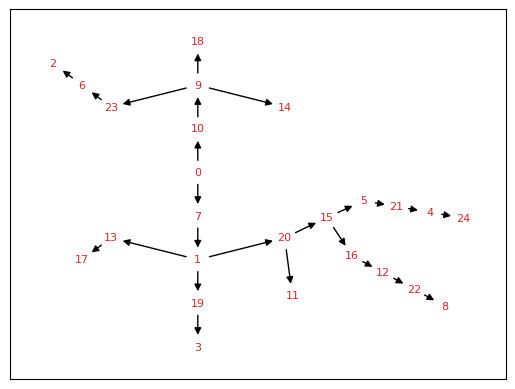

In [7]:
layout = hierarchyc_pos(tree, 0)
draw_tree(tree, layout, draw_path=False)

0: (9.35190037109079, 0, 10, 7)
10: (1.717995940184083, 0.7143548480801263, 9, None)
7: (6.868893879361561, 0.05065570346502046, 1, None)
9: (1.29935307205781, 0.41864286812627305, 14, 18)
1: (6.868893879361561, -0.1796378867474524, 13, 20)
14: (0, 0.9602747875893197, None, None)
18: (0, 0.23611291228754083, None, None)
23: (0.10296537218094914, 0.0713019205078872, 6, None)
13: (0.48630010710898797, 0.8954028882343551, 17, None)
19: (0.2064618933041128, 0.10787514732429315, 3, None)
20: (4.767790606151722, 0.5129383845623829, 11, 15)
6: (0.01814723565619225, 0.08481813652475689, 2, None)
17: (0, 0.48630010710898797, None, None)
3: (0, 0.2064618933041128, None, None)
11: (0, 0.6222784469492264, None, None)
15: (4.145512159202496, -0.3910912240095138, 5, 16)
2: (0, 0.01814723565619225, None, None)
16: (1.549761748678586, 0.6311227273401319, 12, None)
5: (1.1807684163784413, 0.783859266805336, 21, None)
12: (1.235899976179542, 0.3138617724990441, 22, None)
21: (0.7828296018155135, 0.39793

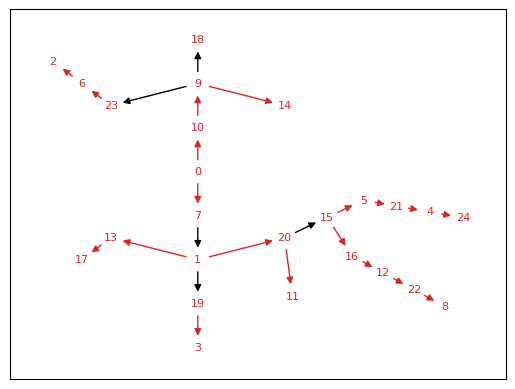

In [8]:
draw_tree(tree, layout)

In [9]:
nx.get_edge_attributes(tree, 'weight')

{(0, 10): 0.7143548480801263,
 (0, 7): 0.05065570346502046,
 (1, 13): 0.8954028882343551,
 (1, 19): 0.10787514732429315,
 (1, 7): 0.33330049781493054,
 (1, 20): 0.5129383845623829,
 (2, 6): 0.01814723565619225,
 (3, 19): 0.2064618933041128,
 (4, 21): 0.0569415830571236,
 (4, 24): 0.7258880187583899,
 (5, 15): 0.783859266805336,
 (5, 21): 0.3979388145629278,
 (6, 23): 0.08481813652475689,
 (8, 22): 0.38094424532114146,
 (9, 14): 0.9602747875893197,
 (9, 18): 0.23611291228754083,
 (9, 23): 0.0713019205078872,
 (9, 10): 0.6547557804138139,
 (11, 20): 0.6222784469492264,
 (12, 22): 0.8549557308584005,
 (12, 16): 0.3138617724990441,
 (13, 17): 0.48630010710898797,
 (15, 16): 0.6311227273401319,
 (15, 20): 0.24003150333061807}

### Unit edge weights

In [10]:
ones_tree = nx.random_labeled_tree(n)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

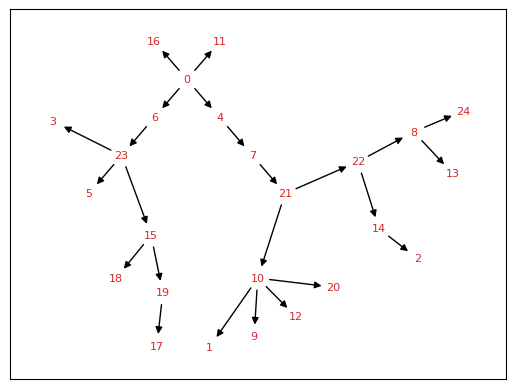

In [11]:
#ones_layout = nx.spring_layout(ones_tree)
ones_layout = hierarchyc_pos(ones_tree, 0)
draw_tree(ones_tree, ones_layout, draw_path=False)

0: (16, 0, 16, 11)
11: (0, 1, None, None)
16: (0, 1, None, None)
6: (5, 1, 23, None)
4: (9, 1, 7, None)
23: (5, 0, 5, 3)
7: (8, 1, 21, None)
3: (0, 1, None, None)
5: (0, 1, None, None)
15: (3, 0, 19, 18)
21: (7, 1, 22, 10)
18: (0, 1, None, None)
19: (1, 1, 17, None)
10: (2, 0, 9, 1)
22: (4, 1, 14, 8)
17: (0, 1, None, None)
1: (0, 1, None, None)
9: (0, 1, None, None)
12: (0, 1, None, None)
20: (0, 1, None, None)
14: (1, 1, 2, None)
8: (2, 0, 24, 13)
2: (0, 1, None, None)
13: (0, 1, None, None)
24: (0, 1, None, None)
Path edges: [(0, 16), (0, 11), (4, 7), (23, 5), (23, 3), (7, 21), (15, 19), (15, 18), (21, 22), (19, 17), (10, 9), (10, 1), (22, 14), (14, 2), (8, 24), (8, 13)]
Total path length (x(root)): 16
Total path length (actual): 16
Difference: 0


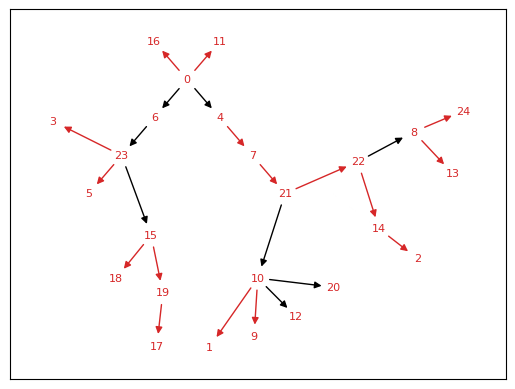

In [12]:
draw_tree(ones_tree, ones_layout)

In [13]:
util.path_cover_two(ones_tree)

{11: 0,
 16: 0,
 3: 0,
 5: 0,
 18: 0,
 17: 0,
 1: 0,
 9: 0,
 12: 0,
 20: 0,
 2: 0,
 13: 0,
 24: 0,
 8: 2,
 14: 1,
 22: 4,
 10: 2,
 19: 1,
 21: 7,
 15: 3,
 7: 8,
 23: 5,
 4: 9,
 6: 5,
 0: 16}